In [8]:
"""导入包"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
import pandas as pd
import seaborn as sns
import scipy
"""导入数据"""
_vali_woe = pd.read_csv("../vail_woe.csv")
_model_woe = pd.read_csv("../model_woe.csv")

vali_woe = pd.read_csv("../8_test.csv")
model_woe = pd.read_csv("../8_train.csv")
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
#交换age列，是训练数据与测试数据一一对应
mid = vali_X['age']
vali_X.drop(labels = "age",axis=1,inplace=True)
vali_X.insert(0,"age",mid)

from sklearn.linear_model import LogisticRegression as LR

lr = LR(penalty="l2").fit(X,y)
lr.score(vali_X,vali_y)

0.7736072556714846

In [14]:
vali_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83576 entries, 0 to 83575
Data columns (total 8 columns):
age                                     83576 non-null float64
RevolvingUtilizationOfUnsecuredLines    83576 non-null float64
DebtRatio                               83576 non-null float64
MonthlyIncome                           83576 non-null float64
NumberOfOpenCreditLinesAndLoans         83576 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    83576 non-null float64
NumberOfTimes90DaysLate                 83576 non-null float64
NumberOfDependents                      83576 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


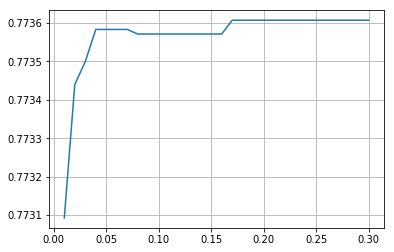

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

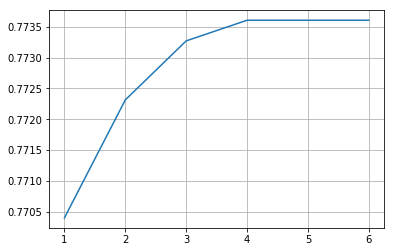

In [16]:
#模型的参数检验
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.3,30)

score = []
for i in c_2: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_2,score)
plt.grid()
plt.show()

lr.n_iter_

score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.3,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.grid()
plt.show()


In [6]:
lr.n_iter_

array([5], dtype=int32)

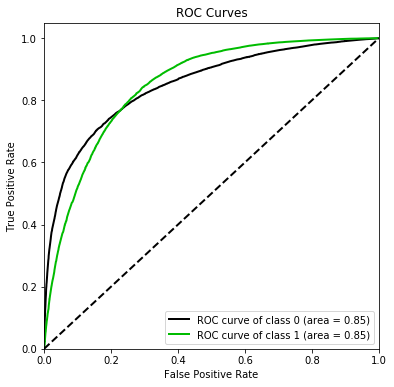

In [17]:
#AUC
import scikitplot as skplt
lr = LR(solver='liblinear').fit(X,y)
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))

skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

In [11]:
._check_n_features

<bound method BaseEstimator._check_n_features of LogisticRegression(C=0.3, max_iter=6, solver='liblinear')>
